<a href="https://colab.research.google.com/github/farnazahmadivafa1999/Project-Management/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load data
import pandas as pd
print(" Loading data...")
df = pd.read_excel("final_dataset.xlsx")
df["Predicted_Cost"] = df["Predicted_Cost"].replace(",", "", regex=True).astype(float)

 Loading data...


In [ ]:
df.head()

,PN,project_id,project_type,city,Construction_Area,cost_per_sqmeter,Predicted_Cost,estimated_duration_day,Predicted_Labor_Hour,Start date,End date,Actual_duration_day,delay_day,delay_percent,cost_overrun_percent
0,PN1,1,Residential Tower,Los Angeles,3012,5647.269920,17009577.0,802,174752.738142,2017-03-20,2020-02-14,1061,259,32.294264,0.205393
1,PN2,2,Detached House,Houston,213,2001.610329,426343.0,274,5259.793849,2021-05-16,2022-03-11,299,25,9.124088,0.050561
2,PN3,3,Residential Tower,Chicago,7816,3915.670036,30604877.0,997,286436.328707,2016-08-15,2020-05-16,1370,373,37.412237,0.352706
3,PN4,4,Residential Tower,Houston,5753,3445.969929,19824665.0,872,163316.859923,2020-10-06,2023-08-13,1041,169,19.380734,0.252836
4,PN5,5,Residential Tower,New York,7074,5825.050042,41206404.0,866,345408.332412,2019-10-29,2022-12-05,1133,267,30.831409,0.313740


In [ ]:
df.describe()

,project_id,Construction_Area,cost_per_sqmeter,Predicted_Cost,estimated_duration_day,Predicted_Labor_Hour,Start date,End date,Actual_duration_day,delay_day,delay_percent,cost_overrun_percent
count,2980.000000,2980.000000,2980.000000,2.980000e+03,2980.000000,2.980000e+03,2980,2980,2980.000000,2980.000000,2980.000000,2980.000000
mean,1490.500000,4042.522819,3689.911415,1.820607e+07,583.794631,1.572239e+05,2020-01-03 18:24:09.664429568,2022-01-04 17:32:56.375838976,731.964430,148.169799,23.818367,0.184002
min,1.000000,110.000000,1414.078212,2.531200e+05,195.000000,3.083470e+03,2015-01-27 00:00:00,2019-01-01 00:00:00,221.000000,-1.000000,-0.392157,-0.037171
25%,745.750000,335.000000,2747.679457,9.921048e+05,383.000000,1.263846e+04,2018-07-10 00:00:00,2020-07-17 18:00:00,461.000000,76.000000,18.858206,0.070612
50%,1490.500000,1368.000000,3550.000014,4.885613e+06,549.500000,5.425571e+04,2020-01-05 12:00:00,2022-01-08 00:00:00,683.500000,132.000000,23.772844,0.138190
75%,2235.250000,7318.750000,4447.674978,3.082673e+07,777.000000,2.605601e+05,2021-07-18 00:00:00,2023-07-21 12:00:00,984.000000,207.000000,28.979331,0.278695
max,2980.000000,18982.000000,7346.649930,1.197297e+08,1095.000000,1.000431e+06,2024-02-08 00:00:00,2024-12-30 00:00:00,1535.000000,449.000000,45.652174,0.706761
std,860.396227,4335.994737,1291.069176,2.212000e+07,227.866293,1.855888e+05,NaN,NaN,309.109539,87.986480,7.487937,0.138108


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2980 entries, 0 to 2979
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   PN                      2980 non-null   object        
 1   project_id              2980 non-null   int64         
 2   project_type            2980 non-null   object        
 3   city                    2980 non-null   object        
 4   Construction_Area       2980 non-null   int64         
 5   cost_per_sqmeter        2980 non-null   float64       
 6   Predicted_Cost          2980 non-null   float64       
 7   estimated_duration_day  2980 non-null   int64         
 8   Predicted_Labor_Hour    2980 non-null   float64       
 9   Start date              2980 non-null   datetime64[ns]
 10  End date                2980 non-null   datetime64[ns]
 11  Actual_duration_day     2980 non-null   int64         
 12  delay_day               2980 non-null   int64   

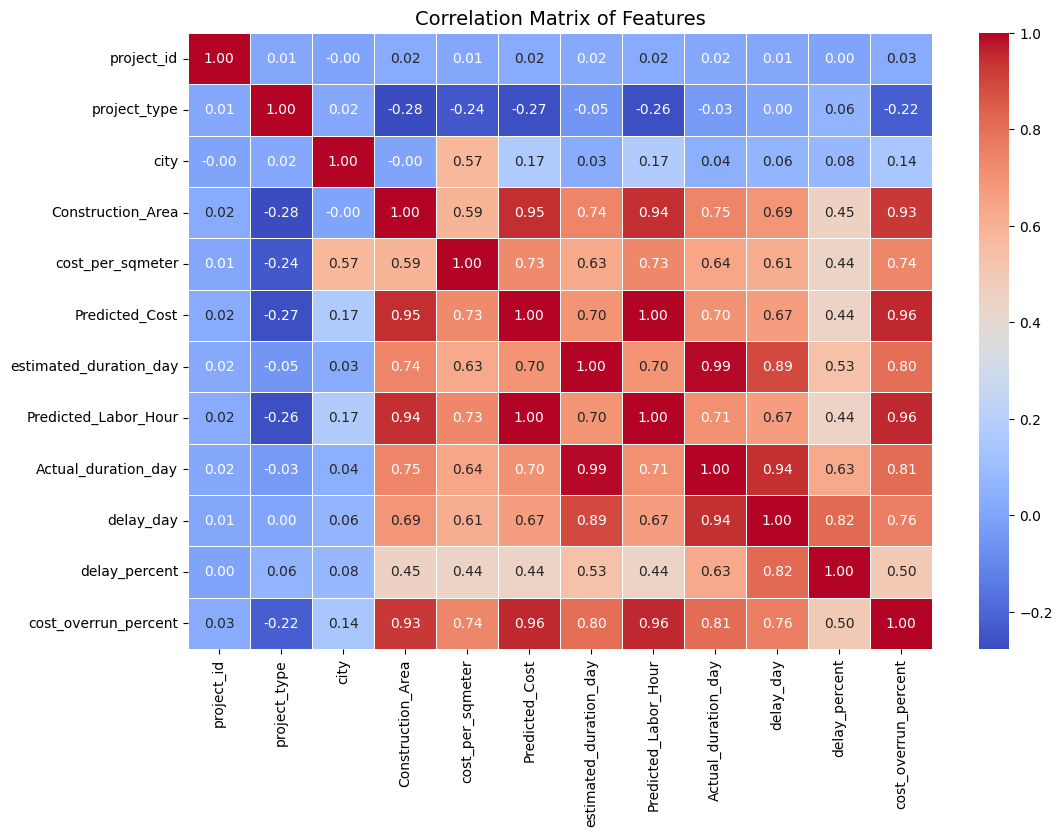

In [ ]:
# Correlation Matrix
import seaborn as sns

# Convert categorical features temporarily for correlation (numerical only)
df_corr = df.copy()
df_corr["project_type"] = df_corr["project_type"].astype("category").cat.codes
df_corr["city"] = df_corr["city"].astype("category").cat.codes

# Select numerical features for correlation
corr_matrix = df_corr.corr(numeric_only=True)

# Plot heatmap
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Features", fontsize=14)
plt.show()

array([[<Axes: title={'center': 'Predicted_Cost'}>,
        <Axes: title={'center': 'estimated_duration_day'}>]], dtype=object)

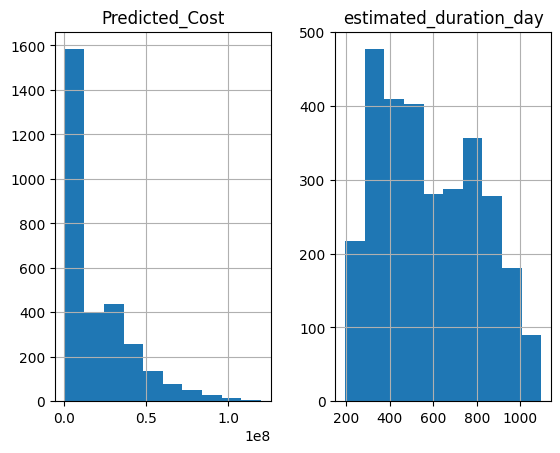

In [ ]:
df[["project_type", "city", "Predicted_Cost", "estimated_duration_day"]].hist()

In [ ]:
# ----------------------------
# Part 1: Data Preparation
# ----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Features and target
X = df[["project_type", "city", "Construction_Area", "Predicted_Cost", "estimated_duration_day", "Predicted_Labor_Hour"]]
y = df["cost_overrun_percent"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessor
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(), ["project_type", "city"]),
    ("num", StandardScaler(), ["Construction_Area", "Predicted_Cost", "estimated_duration_day",  "Predicted_Labor_Hour"])
])

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)
print(" Data preprocessing complete.")

 Data preprocessing complete.


 Training Linear Regression model...
 Linear Regression completed in 0.04 sec
 MAE: 0.0232
 MSE: 0.0009
 R2: 0.9529


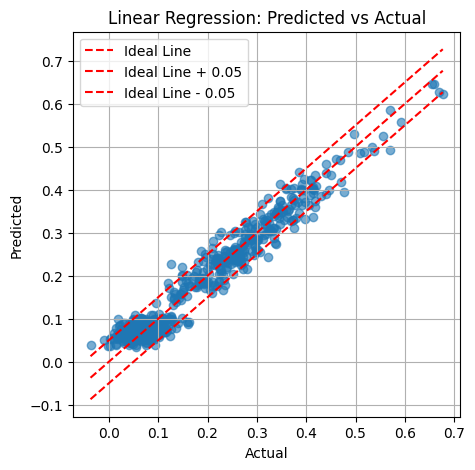

In [ ]:

# ----------------------------
# Part 2: Linear Regression
# ----------------------------
from sklearn.linear_model import LinearRegression

print(" Training Linear Regression model...")
lr_model = LinearRegression()
start = time.time()
lr_model.fit(X_train_processed, y_train)
lr_train_time = time.time() - start

# Evaluation
lr_preds = lr_model.predict(X_test_processed)
lr_mae = mean_absolute_error(y_test, lr_preds)
lr_mse = mean_squared_error(y_test, lr_preds)
lr_r2 = r2_score(y_test, lr_preds)

print(f" Linear Regression completed in {lr_train_time:.2f} sec")
print(f" MAE: {lr_mae:.4f}")
print(f" MSE: {lr_mse:.4f}")
print(f" R2: {lr_r2:.4f}")

# Calculate min and max values for plot bounds
min_val = min(min(y_test), min(lr_preds))
max_val = max(max(y_test), max(lr_preds))

# Plot
plt.figure(figsize=(5,5))
plt.scatter(y_test, lr_preds, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Line')
plt.plot([min_val, max_val], [min_val+0.05, max_val+0.05], color='red', linestyle='--', label='Ideal Line + 0.05')
plt.plot([min_val, max_val], [min_val-0.05, max_val-0.05], color='red', linestyle='--', label='Ideal Line - 0.05')

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression: Predicted vs Actual")
plt.legend()
plt.grid(True)
plt.show()





 Random Forest Regressor Results
Training Time: 1.49 seconds
MAE: 0.02512
MSE: 0.00101
R2 Score: 0.94461


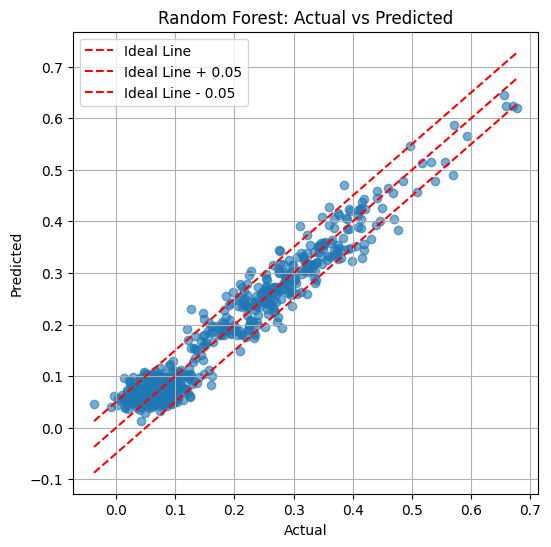

In [ ]:
# ----------------------------
# Part 3: Random Forest Regression
# ----------------------------
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time

# Train the Random Forest model
start_time = time.time()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_processed, y_train)
train_time_rf = time.time() - start_time

# Predict and evaluate
rf_pred = rf.predict(X_test_processed)
mae_rf = mean_absolute_error(y_test, rf_pred)
mse_rf = mean_squared_error(y_test, rf_pred)
r2_rf = r2_score(y_test, rf_pred)

print(" Random Forest Regressor Results")
print(f"Training Time: {train_time_rf:.2f} seconds")
print(f"MAE: {mae_rf:.5f}")
print(f"MSE: {mse_rf:.5f}")
print(f"R2 Score: {r2_rf:.5f}")

# Plot predicted vs actual
plt.figure(figsize=(6,6))
plt.scatter(y_test, rf_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Line')
plt.plot([min_val, max_val], [min_val+0.05, max_val+0.05], color='red', linestyle='--', label='Ideal Line + 0.05')
plt.plot([min_val, max_val], [min_val-0.05, max_val-0.05], color='red', linestyle='--', label='Ideal Line - 0.05')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Random Forest: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


239/239 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 1.3671 - mae: 0.9265 - mse: 1.3671 - r2_score: -66.0241 - val_loss: 0.0324 - val_mae: 0.1408 - val_mse: 0.0324 - val_r2_score: -0.7639
Epoch 2/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5936 - mae: 0.6088 - mse: 0.5936 - r2_score: -30.4193 - val_loss: 0.0108 - val_mae: 0.0835 - val_mse: 0.0108 - val_r2_score: 0.4149
Epoch 3/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2779 - mae: 0.4054 - mse: 0.2779 - r2_score: -13.6286 - val_loss: 0.0109 - val_mae: 0.0828 - val_mse: 0.0109 - val_r2_score: 0.4068
Epoch 4/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1387 - mae: 0.2874 - mse: 0.1387 - r2_score: -6.7108 - val_loss: 0.0046 - val_mae: 0.0540 - val_mse: 0.0046 - val_r2_score: 0.7504
Epoch 5/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0714 - mae: 0.2065 - mse: 0.0714 - r2_score: -2.7867 - val_loss: 0.0021 - val_mae: 0.0357 - val_mse: 0.0021 - val_r2_score: 0.8871
Epoch 6/100
239/239 ━━━━━━━━━━━━━━━━━━

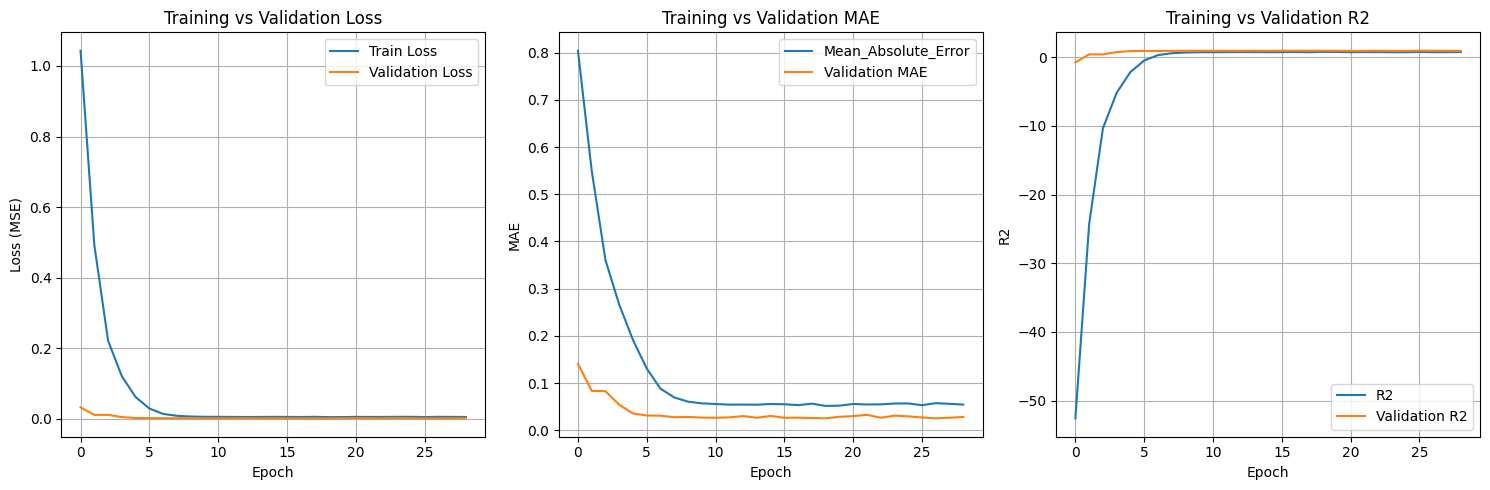

The model's preprocessor and scaler have been successfully saved.
Training Time: 39.01 seconds


In [ ]:
# ----------------------------
# Part 4:Neural Network
# ----------------------------

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout
from tensorflow.keras.callbacks import EarlyStopping
import time

df["Predicted Cost"] = df["Predicted_Cost"].replace(",", "", regex=True).astype(float)

# Features and target
X = df[["project_type", "city", "Construction_Area", "Predicted_Cost", "estimated_duration_day", "Predicted_Labor_Hour"]]
y = df["cost_overrun_percent"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the target variable (cost overrun) to a 0–1 range using MinMaxScaler
y_scaler = MinMaxScaler()
y_scaled_train = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()

# Apply preprocessing: one-hot encode categorical features and standardize numerical features
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(), ["project_type", "city"]),
    ("num", StandardScaler(), ["Construction_Area", "Predicted_Cost", "estimated_duration_day",  "Predicted_Labor_Hour"])
])

# Fit the preprocessor on training data and transform it
X_processed_train = preprocessor.fit_transform(X_train)

# Define the neural network architecture
model = Sequential([
    Dense(64, activation='elu', input_shape=(X_processed_train.shape[1],)),
    BatchNormalization(),
    Dense(32,activation='elu'),
    BatchNormalization(),
    Dense(32, activation='elu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(1)  # خروجی: cost overrun
])

# Compile the model with Mean Squared Error loss and common regression metrics
model.compile(optimizer="adam", loss="mse", metrics=["mae", "mse",'r2_score'])

# Set up early stopping
early_stop = EarlyStopping(monitor='val_mae', patience=10, restore_best_weights=True)


start_time = time.time()

# Train the model with early stopping and a validation split
history = model.fit(
    X_processed_train, y_train,
    validation_split = 0.2,
    epochs=100,
    batch_size=8,
    callbacks=[early_stop],
    verbose=1
)

# Transform the test set using the same preprocessing pipeline
X_test_transformed = preprocessor.transform(X_test)

# Normalize the test labels using the same scaler as training
Y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1)).flatten()

# Evaluate the trained model on the test data
loss, mae, mse, r2 = model.evaluate(X_test_transformed, y_test)
print(f" Mean Absolute Error (MAE): {mae:.5f}")
print(f" Mean Squared Error (MSE): {mse:.5f}")
print(f" R2 Score is : {r2:.5f}")


# Plot training and validation metrics over epochs
plt.figure(figsize=(15,5))

# Plot training vs validation loss (Mean Squared Error)
plt.subplot(1,3,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Plot training vs validation MAE (Mean Absolute Error)
plt.subplot(1,3,2)
plt.plot(history.history['mae'], label='Mean_Absolute_Error')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.title("Training vs Validation MAE")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Plot training vs validation R² Score
plt.subplot(1,3,3)
plt.plot(history.history['r2_score'], label='R2')
plt.plot(history.history['val_r2_score'], label='Validation R2')
plt.xlabel("Epoch")
plt.ylabel("R2")
plt.title("Training vs Validation R2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Save the preprocessor and output scaler for future predictions
joblib.dump(preprocessor, "preprocessor.pkl")
joblib.dump(y_scaler, "y_scaler.pkl")
print("The model's preprocessor and scaler have been successfully saved.")

# Calculate and print the total training time
train_time_nn = time.time() - start_time
print(f"Training Time: {train_time_nn:.2f} seconds")


In [ ]:
Y_pred = model.predict(X_test_transformed)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


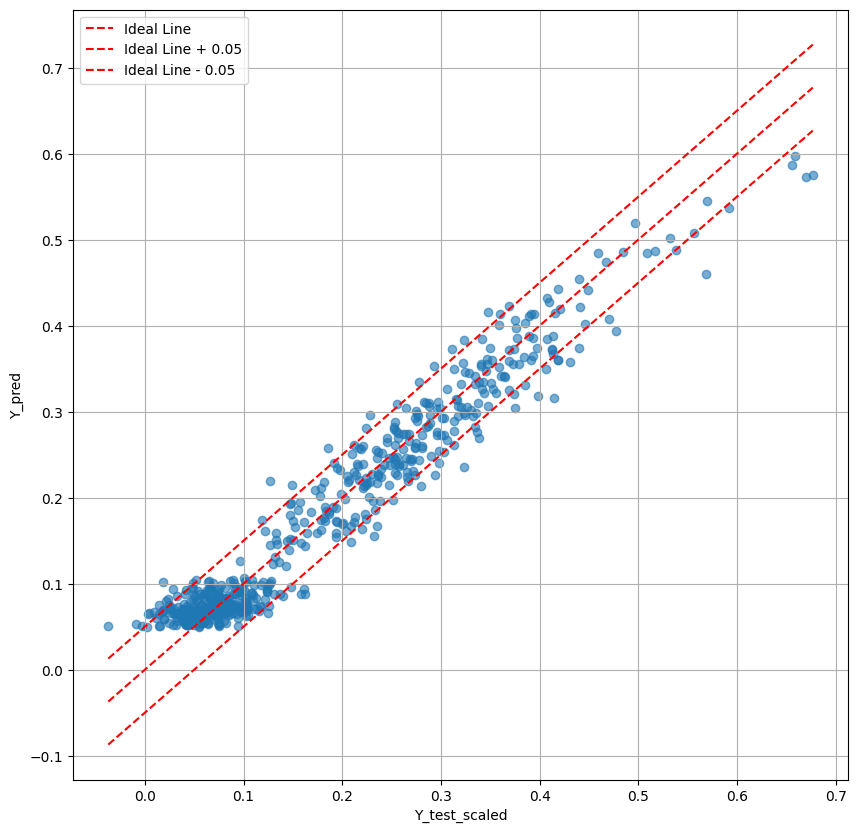

In [ ]:
import numpy as np

# Automatically get min/max to fit your scatter
min_val = min(min(y_test), min(Y_pred))
max_val = max(max(y_test), max(Y_pred))

plt.figure(figsize=(10,10))
plt.scatter(y_test, Y_pred, alpha=0.6)
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Line')
plt.plot([min_val, max_val], [min_val+0.05, max_val+0.05], color='red', linestyle='--', label='Ideal Line + 0.05')
plt.plot([min_val, max_val], [min_val-0.05, max_val-0.05], color='red', linestyle='--', label='Ideal Line - 0.05')
plt.xlabel("Actual")
plt.xlabel("Y_test_scaled")
plt.ylabel("Y_pred")
plt.legend()
plt.grid(True)
plt.show()


📊 Model Comparison Table:
               Model       MAE       MSE  R2 Score  Training Time (s)
0  Linear Regression  0.023176  0.000862  0.952853           0.038330
1      Random Forest  0.025117  0.001013  0.944612           1.490171
2     Neural Network  0.025124  0.001009  0.944832          39.008610


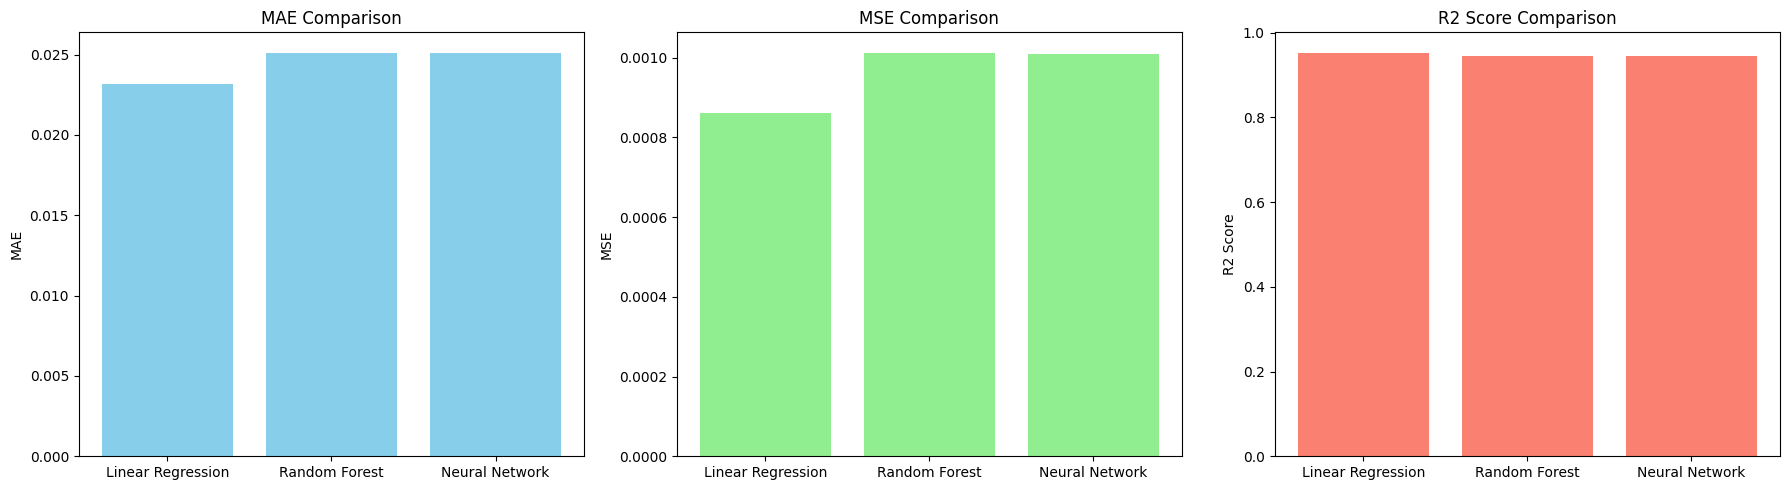

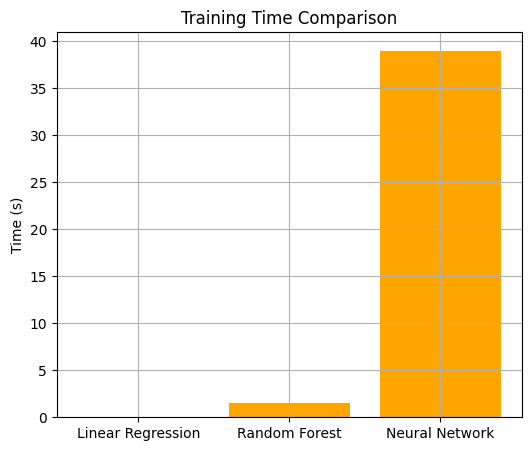

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Use your actual variables from model evaluation
model_names = ['Linear Regression', 'Random Forest', 'Neural Network']
mae_values = [lr_mae, mae_rf, mae]
mse_values = [lr_mse, mse_rf, mse]
r2_values = [lr_r2, r2_rf, r2]
train_times = [lr_train_time, train_time_rf, train_time_nn]

# Create a results table using DataFrame
results_df = pd.DataFrame({
    'Model': model_names,
    'MAE': mae_values,
    'MSE': mse_values,
    'R2 Score': r2_values,
    'Training Time (s)': train_times
})

# Display the table
print("📊 Model Comparison Table:")
print(results_df)

# Plot 1: MAE, MSE, R2 Score
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].bar(model_names, mae_values, color='skyblue')
axs[0].set_title('MAE Comparison')
axs[0].set_ylabel('MAE')

axs[1].bar(model_names, mse_values, color='lightgreen')
axs[1].set_title('MSE Comparison')
axs[1].set_ylabel('MSE')

axs[2].bar(model_names, r2_values, color='salmon')
axs[2].set_title('R2 Score Comparison')
axs[2].set_ylabel('R2 Score')

plt.tight_layout()
plt.show()

# Plot 2: Training Time
plt.figure(figsize=(6, 5))
plt.bar(model_names, train_times, color='orange')
plt.title('Training Time Comparison')
plt.ylabel('Time (s)')
plt.grid(True)
plt.show()


In [ ]:
# for controlling based on the data, read the new input data (only features)
df_input = pd.read_excel("final_test_dataset_without.xlsx")
df_input["Predicted_Cost"] = df_input["Predicted_Cost"].replace(",", "", regex=True).astype(float)

print(" Reading input features for controll'")

X_new = df_input[["project_type", "city", "Predicted_Cost", "estimated_duration_day",
                  "Predicted_Labor_Hour", "Construction_Area"]]

# Preprocess input with saved preprocessor
X_new_processed = preprocessor.transform(X_new)

# Predict using trained model
y_pred_new = model.predict(X_new_processed).flatten()

print("✅ Input features loaded:\n", X_new.head())
print("✅ Predicted Cost Overrun Percentages (per project):")
for idx, val in enumerate(y_pred_new, start=1):
    print(f"Project {idx}: {val * 100:.2f}%")


 Reading input features for controll'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
✅ Input features loaded:
           project_type         city  Predicted_Cost  estimated_duration_day  \
0    Residential Tower  Los Angeles      94584364.0                     824   
1  Commercial Building      Chicago      39288394.0                     822   
2      Small Apartment  Los Angeles        971321.0                     437   
3    Residential Tower  Los Angeles      66121549.0                     815   
4  Commercial Building     New York      24388509.0                     612   

   Predicted_Labor_Hour  Construction_Area  
0         813062.943517              16187  
1         323980.131472               8728  
2          11799.457282                311  
3         560888.999984              10807  
4         209207.530451               4213  
✅ Predicted Cost Overrun Percentages (per project):
Project 1: 54.22%
Project 2: 30.73%
Project 3: 7.58%
Project 4: 44.37%
Project 5: 21.85%
Project 6: 4

In [ ]:
#  Read actual outputs from the  Read actual outputs from second file
df_output = pd.read_excel("final_test_dataset.xlsx")
y_actual = df_output["cost_overrun_percent"].values
print(" Reading actual values")
print("✅ Predicted Cost Overrun Percentages (per project):")
for idx, val in enumerate(y_actual, start=1):
    print(f"Project {idx}: {val * 100:.2f}%")

 Reading actual values
✅ Predicted Cost Overrun Percentages (per project):
Project 1: 62.34%
Project 2: 33.18%
Project 3: 12.83%
Project 4: 49.04%
Project 5: 18.96%
Project 6: 41.90%
Project 7: 20.40%
Project 8: 4.77%
Project 9: 6.85%
Project 10: 29.42%
Project 11: 6.72%
Project 12: 29.37%
Project 13: 26.59%
Project 14: 34.72%
Project 15: 28.25%
Project 16: 40.06%
Project 17: 28.34%
Project 18: 6.52%
Project 19: 22.59%
Project 20: 10.78%


In [ ]:
# Compare predictions with actual values
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_new = mean_absolute_error(y_actual, y_pred_new)
mse_new = mean_squared_error(y_actual, y_pred_new)

print("Evaluation Results")
print(f"✅ Mean Absolute Error (MAE): {mae_new:.5f}")
print(f"✅ Mean Squared Error (MSE): {mse_new:.5f}")


Evaluation Results
✅ Mean Absolute Error (MAE): 0.02648
✅ Mean Squared Error (MSE): 0.00115


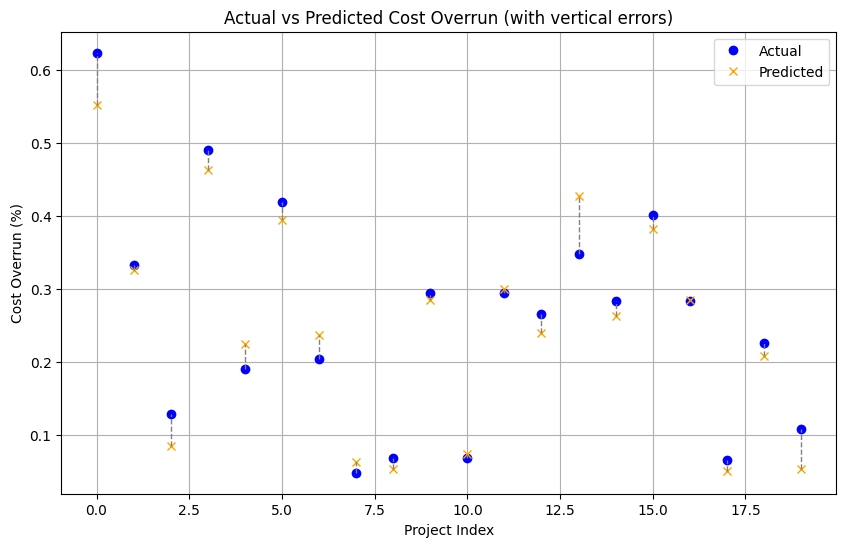

In [ ]:
# Visual comparison with vertical lines connecting actual and predicted values
plt.figure(figsize=(10,6))

# Plot actual values as circles
plt.plot(y_actual, 'o', label='Actual', color='blue', markersize=6)

# Plot predicted values as x's
plt.plot(y_pred_new, 'x', label='Predicted', color='orange', markersize=6)

# Draw vertical lines between actual and predicted for each project
for i in range(len(y_actual)):
    plt.vlines(x=i, ymin=min(y_actual[i], y_pred_new[i]), ymax=max(y_actual[i], y_pred_new[i]),
               color='gray', linestyle='--', linewidth=1)

plt.xlabel("Project Index")
plt.ylabel("Cost Overrun (%)")
plt.title("Actual vs Predicted Cost Overrun (with vertical errors)")
plt.legend()
plt.grid(True)
plt.show()
